In [1]:
import os
import sys
sys.path.append('../src')
from datetime import datetime
from preprocess import preprocess
from functions import random_points_in_circle, plot_particle_tracking, run_ctracker

### Tracing Period

In [2]:
start = datetime(2023, 7, 2, 6)
end = datetime(2023, 7, 4, 6)

### Lake Selection
["ageri", "biel", "caldonazzo", "garda", "geneva", "greifensee",
 "hallwil", "joux", "lugano", "murten", "stmoritz", "zurich"]

In [3]:
lake = "hallwil"

### Run ID

In [4]:
run_id = "testing"

### Generate Particles
random_points_in_circle(x, y, radius, particles, minZ, maxZ)

In [5]:
particles = random_points_in_circle(658735, 237277, 100, 10000, 0.5, 10)

### Preprocess inputs
This section generates the necessary input files to run ctracker

In [6]:
out = preprocess(run_id, lake, start, end, particles)

/home/runnalja/git/alplakes/particletracking/runs/hallwil_202307020600_202307040600_testing


## Run ctracker

Run on the command line
```
conda activate ctracker
cd ctracker
python run.py "working_dir"
```
Alternatively for run the function below. (Not recommend for large runs)

In [7]:
run_ctracker(out["working_dir"])


Initializing GCM information from configuration.py

Configuration loaded.

Using forward integration.

Reference date of GCM: 2008-03-01T00:00

Begin particle tracking simulation at: 2023-07-02T06:00

End particle tracking simulation at: 2023-07-04T06:00

Start seeding particles at: 2023-07-02T06:00

Stop seeding particles at: 2023-07-02T06:00

Simulation in 2D :  False
True

Identify seeding points

Number of seeding points: 10000

Seeding interval: 10800s

Number of seeding time steps: 1

Total number of particles to be released: 10000

Running numerics on 8 threads max

Running with 30000 particles per thread min

Input running on a separate thread.

Output running on a separate thread.

Starting ctracker

Start main loop


 2023-07-02T06:00:00.000   |.... active: 10000 ....|....  out: 0 ....|

 2023-07-02T09:00:00.000   |.... active: 10000 ....|....  out: 0 ....|

 2023-07-02T12:00:00.000   |.... active: 10000 ....|....  out: 0 ....|

 2023-07-02T15:00:00.000   |.... active: 10000

/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xmitgcm/mds_store.py:696: UserWarning: Couldn't find available_diagnostics.log in /home/runnalja/git/alplakes/particletracking/runs/hallwil_202307020600_202307040600_testing/velocity_field. Using default version.
  "in %s. Using default version." % data_dir)
/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/runnalja/git/alplakes/particletracking/ctracker/ctracker/ctracker.py:176: RuntimeWarning: divide by zero encountered in true_divide
  self.dsmax = self.dtmax / self.dxyz
/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xarray/backends/netCDF4_.py:324: UserWarning: endian-ness of dtype and endian kwarg do not match, using endian kwarg
  fill_value=fill_value)



### Plot results

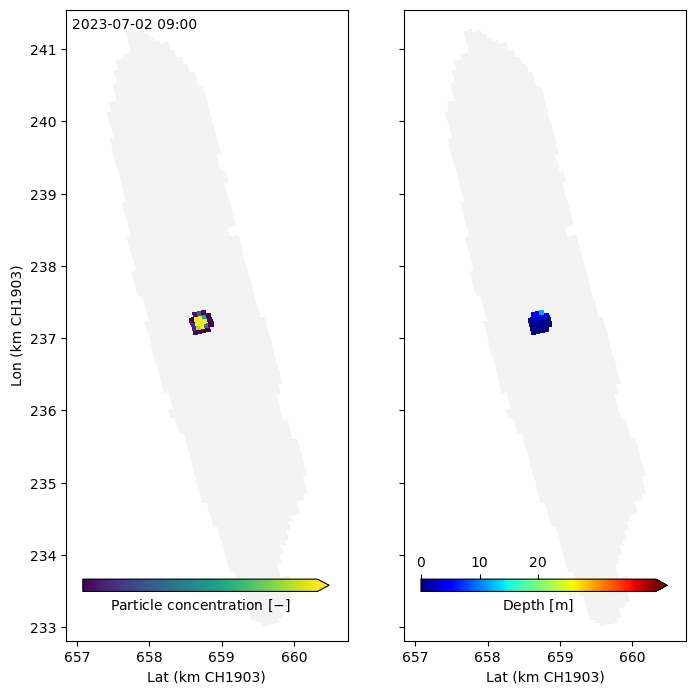

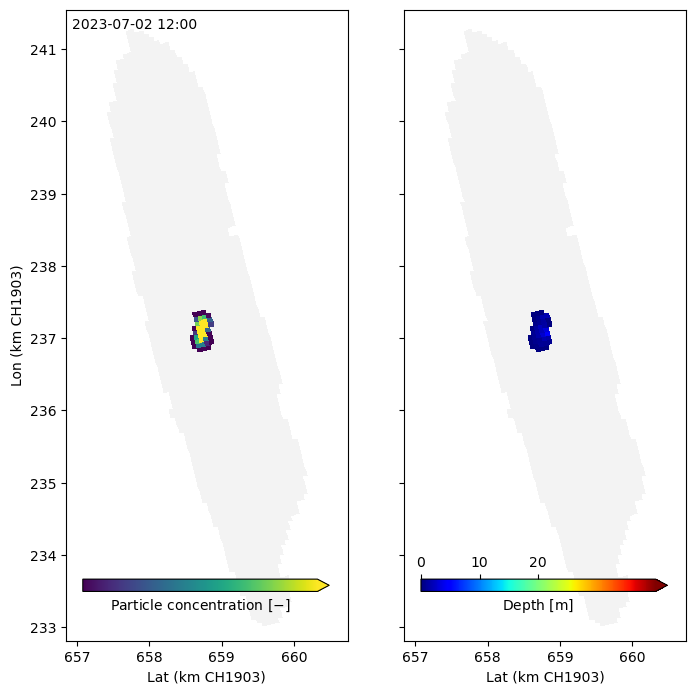

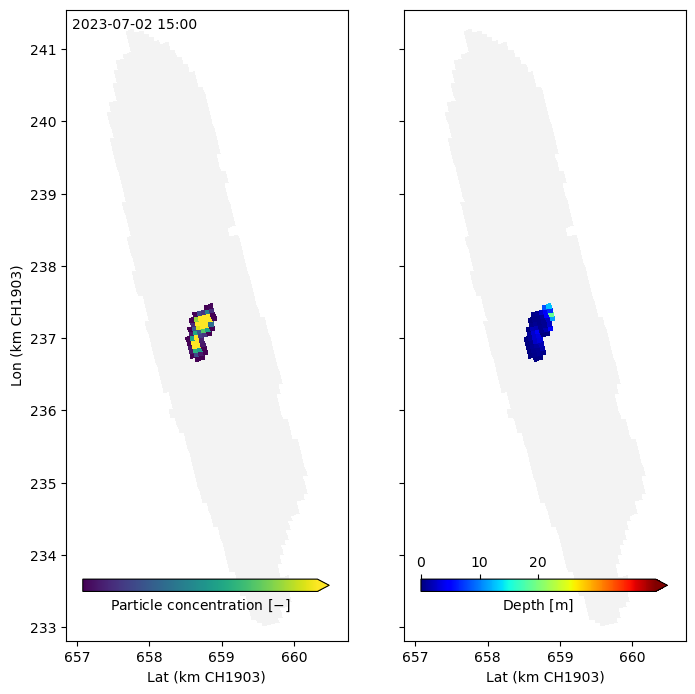

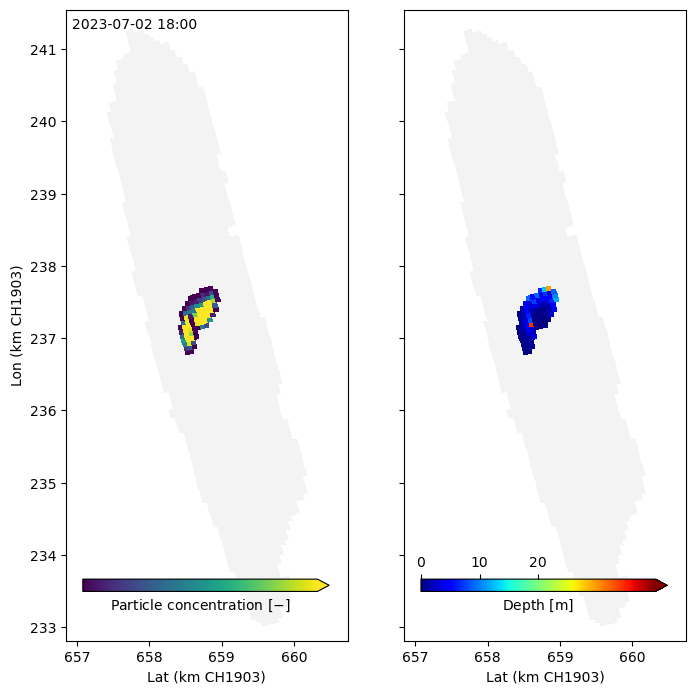

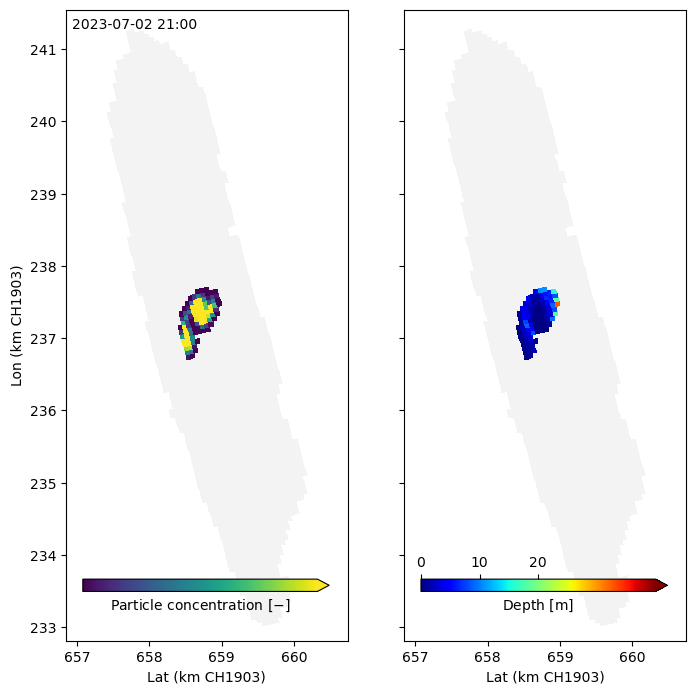

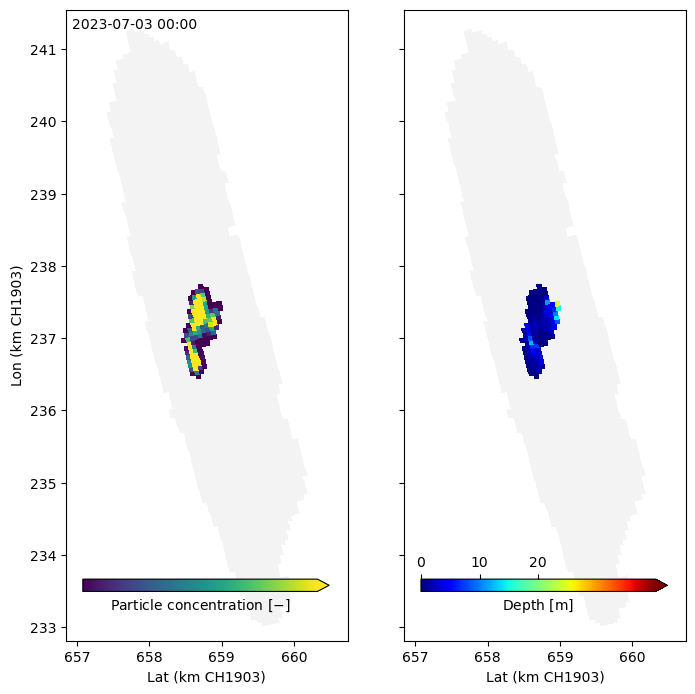

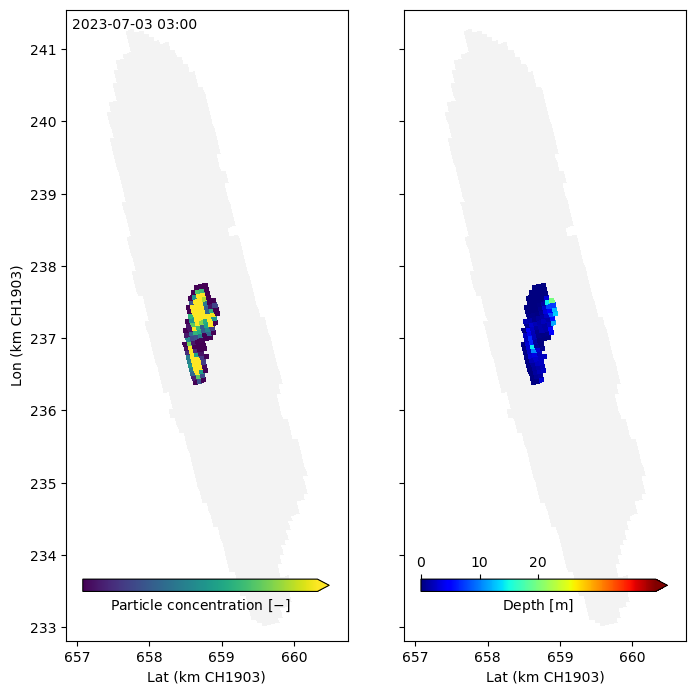

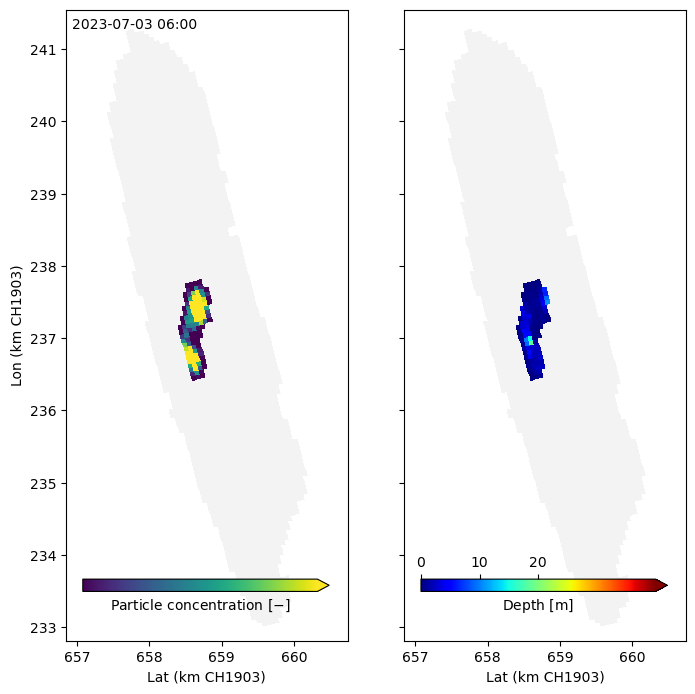

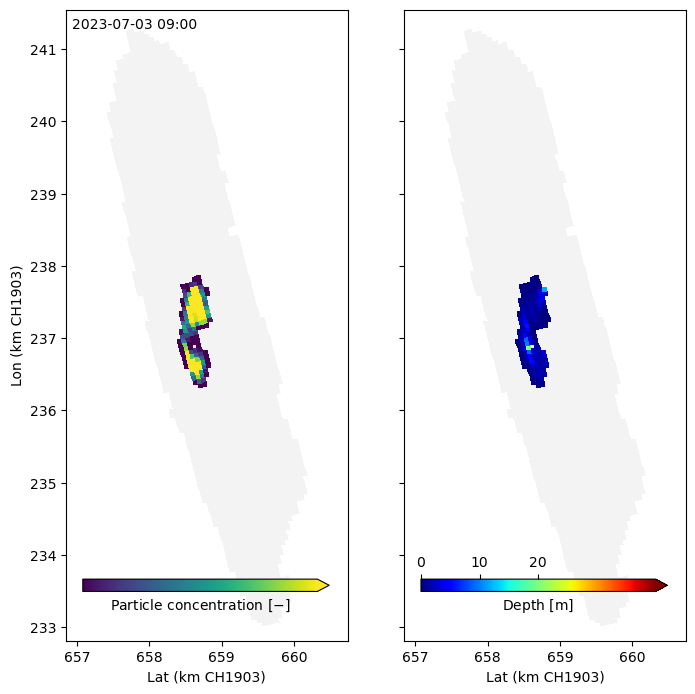

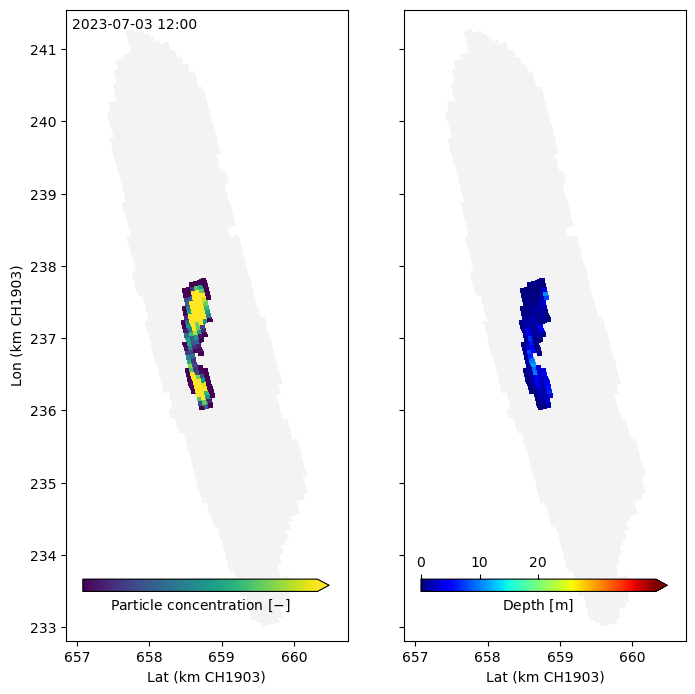

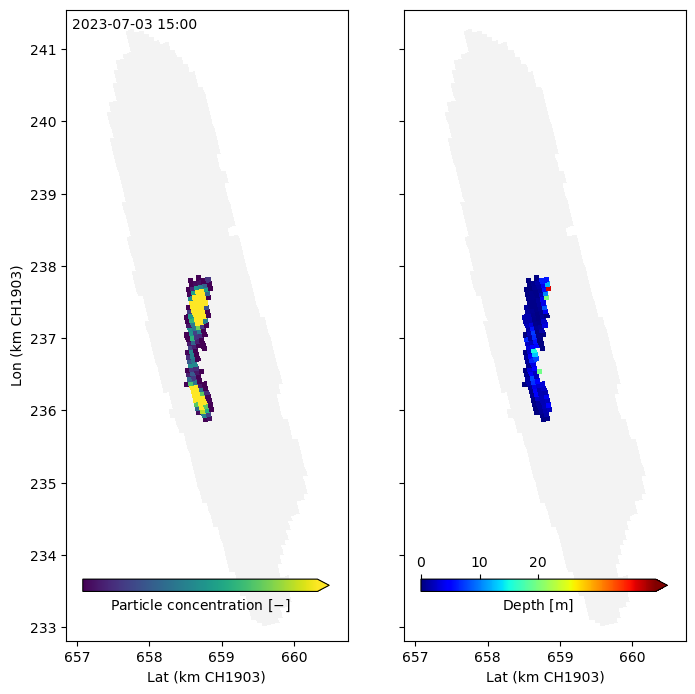

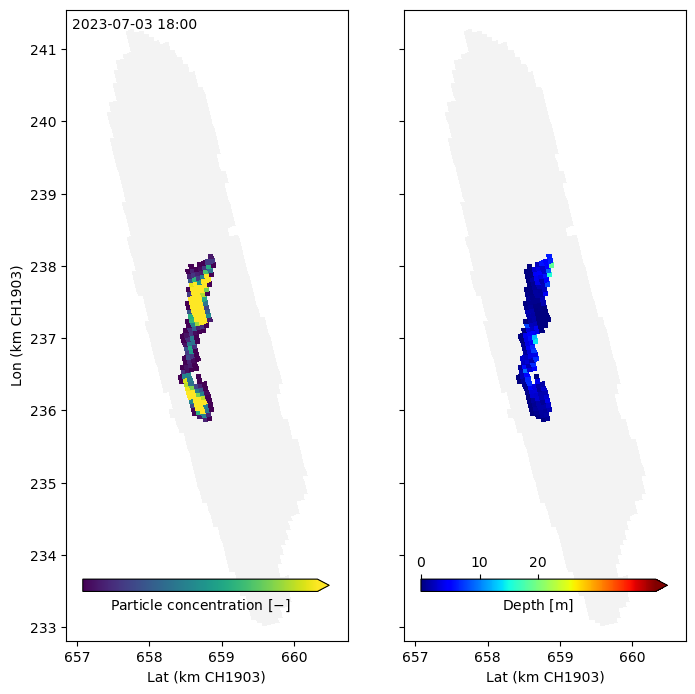

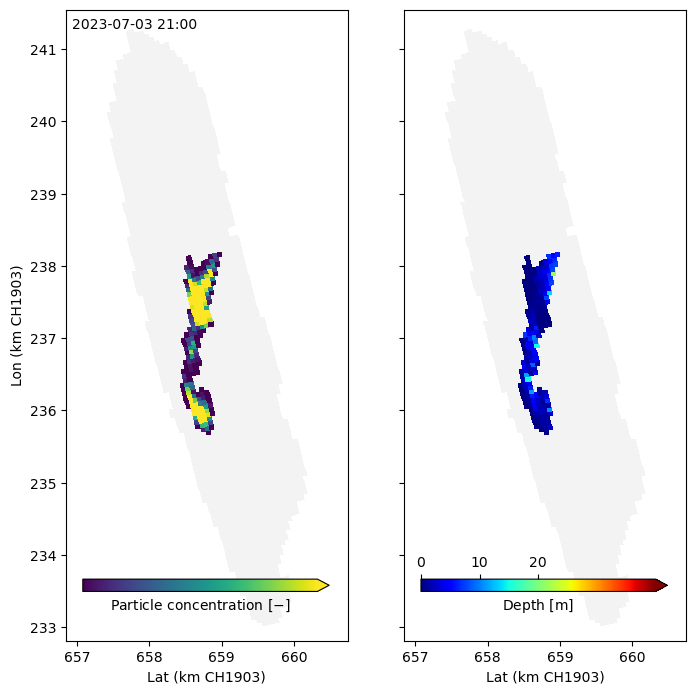

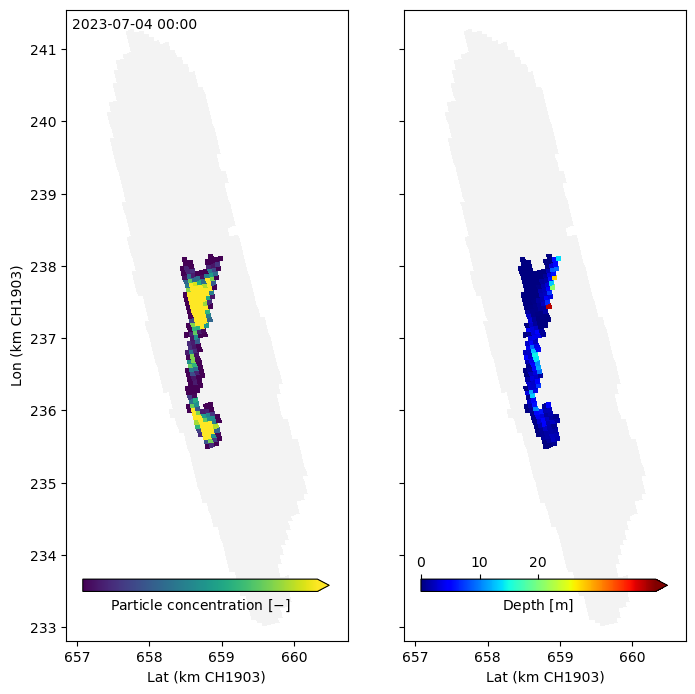

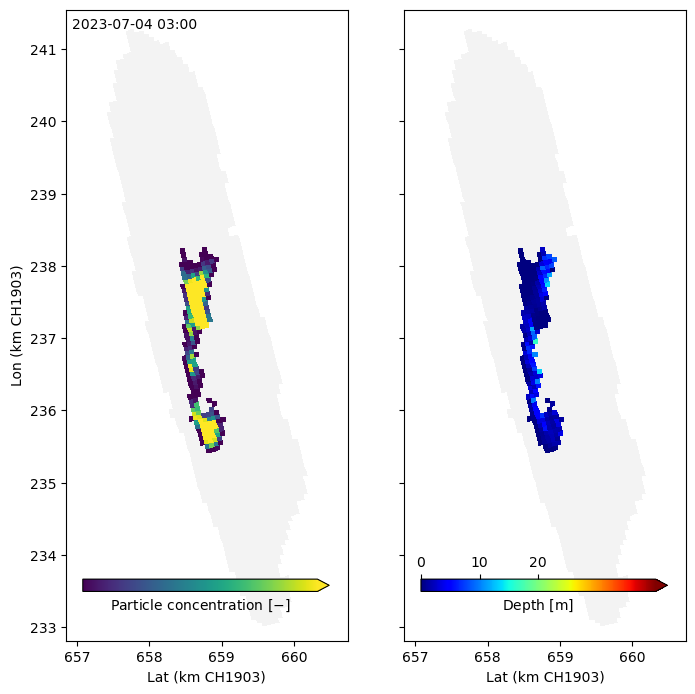

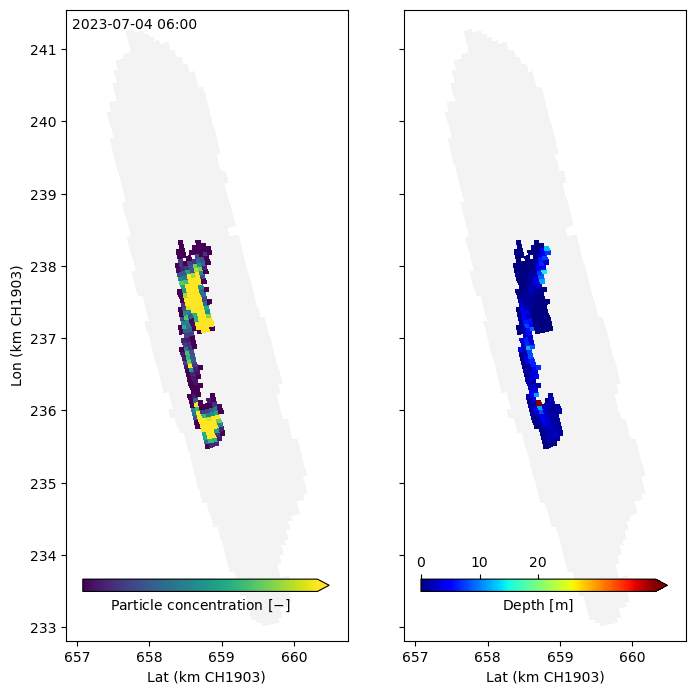

In [8]:
plot_particle_tracking(out["working_dir"], out["x0"], out["y0"], out["x1"], out["y1"], lake, grid_type=out["grid_type"])